<a href="https://colab.research.google.com/github/jaggadas/BERT-sentiment-analysis/blob/main/BERT_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align=center> Fine-Tune BERT for Text Classification with TensorFlow</h2>

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 1: BERT Classification Model</p>
</div>

In this [project](https://www.coursera.org/projects/fine-tune-bert-tensorflow/), you will learn how to fine-tune a BERT model for text classification using TensorFlow and TF-Hub.

The pretrained BERT model used in this project is [available](https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2) on [TensorFlow Hub](https://tfhub.dev/).

### Learning Objectives

By the time you complete this project, you will be able to:

- Build TensorFlow Input Pipelines for Text Data with the [`tf.data`](https://www.tensorflow.org/api_docs/python/tf/data) API
- Tokenize and Preprocess Text for BERT
- Fine-tune BERT for text classification with TensorFlow 2 and [TF Hub](https://tfhub.dev)

### Prerequisites

In order to be successful with this project, it is assumed you are:

- Competent in the Python programming language
- Familiar with deep learning for Natural Language Processing (NLP)
- Familiar with TensorFlow, and its Keras API

### Contents

This project/notebook consists of several Tasks.

- **[Task 1]()**: Introduction to the Project.
- **[Task 2]()**: Setup your TensorFlow and Colab Runtime
- **[Task 3]()**: Download and Import the Quora Insincere Questions Dataset
- **[Task 4]()**: Create tf.data.Datasets for Training and Evaluation
- **[Task 5]()**: Download a Pre-trained BERT Model from TensorFlow Hub
- **[Task 6]()**: Tokenize and Preprocess Text for BERT
- **[Task 7]()**: Wrap a Python Function into a TensorFlow op for Eager Execution
- **[Task 8]()**: Create a TensorFlow Input Pipeline with `tf.data`
- **[Task 9]()**: Add a Classification Head to the BERT `hub.KerasLayer`
- **[Task 10]()**: Fine-Tune BERT for Text Classification
- **[Task 11]()**: Evaluate the BERT Text Classification Model

## Task 2: Setup your TensorFlow and Colab Runtime.

You will only be able to use the Colab Notebook after you save it to your Google Drive folder. Click on the File menu and select “Save a copy in Drive…

![Copy to Drive](https://drive.google.com/uc?id=1CH3eDmuJL8WR0AP1r3UE6sOPuqq8_Wl7)


### Check GPU Availability

Check if your Colab notebook is configured to use Graphical Processing Units (GPUs). If zero GPUs are available, check if the Colab notebook is configured to use GPUs (Menu > Runtime > Change Runtime Type).

![Hardware Accelerator Settings](https://drive.google.com/uc?id=1qrihuuMtvzXJHiRV8M7RngbxFYipXKQx)


In [ ]:
!nvidia-smi

### Install TensorFlow and TensorFlow Model Garden

In [ ]:
import tensorflow as tf
print(tf.version.VERSION)

2.9.2


In [ ]:
!pip install -q tensorflow==2.3.0

In [ ]:
!git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 2650, done.
remote: Counting objects: 100% (2650/2650), done.
remote: Compressing objects: 100% (2311/2311), done.
remote: Total 2650 (delta 505), reused 1389 (delta 306), pack-reused 0
Receiving objects: 100% (2650/2650), 34.02 MiB | 14.96 MiB/s, done.
Resolving deltas: 100% (505/505), done.
Note: switching to '400d68abbccda2f0f6609e3a924467718b144233'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false



In [ ]:
# install requirements to use tensorflow/models repository
!pip install -Uqr models/official/requirements.txt
# you may have to restart the runtime afterwards

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 99.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.2/215.2 KB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 92.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 110.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.1/352.1 KB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 122.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 107.4 MB/s eta 0

## Restart the Runtime

**Note** 
After installing the required Python packages, you'll need to restart the Colab Runtime Engine (Menu > Runtime > Restart runtime...)

![Restart of the Colab Runtime Engine](https://drive.google.com/uc?id=1xnjAy2sxIymKhydkqb0RKzgVK9rh3teH)

## Task 3: Download and Import the Quora Insincere Questions Dataset

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import sys
sys.path.append('models')
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
from official.nlp import optimization

In [ ]:
print("TF Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

TF Version:  2.9.2
Eager mode:  True
Hub version:  0.12.0
GPU is available


A downloadable copy of the [Quora Insincere Questions Classification data](https://www.kaggle.com/c/quora-insincere-questions-classification/data) can be found [https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip](https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip). Decompress and read the data into a pandas DataFrame.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
#train_test_split for splitting data into training and testing data
#df = pd.read_csv to load the dataset
df = pd.read_csv('https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip',
compression ='zip', low_memory = False
)
df.shape # 1.3 million rows


(1306122, 3)

In [ ]:
df.tail(20)# look at last 20 rows

,qid,question_text,target
1306102,ffff3778790af9baae76,What steps can I take to live a normal life if...,0
1306103,ffff3f0a2449ffe4b9ff,Isn't Trump right after all? Why should the US...,1
1306104,ffff41393389d4206066,Is 33 too late for a career in creative advert...,0
1306105,ffff42493fc203cd9532,What is difference between the filteration wor...,0
1306106,ffff48dd47bee89fff79,"If the universe ""popped"" into existence from n...",0
1306107,ffff5fd051a032f32a39,How does a shared service technology team meas...,0
1306108,ffff6d528040d3888b93,How is DSATM civil engineering?,0
1306109,ffff8776cd30cdc8d7f8,Do you know any problem that depends solely on...,0
1306110,ffff94d427ade3716cd1,What are some comic ideas for you Tube videos ...,0
1306111,ffffa382c58368071dc9,"If you had $10 million of Bitcoin, could you s...",0


<AxesSubplot: title={'center': 'Target distribution'}, ylabel='Frequency'>

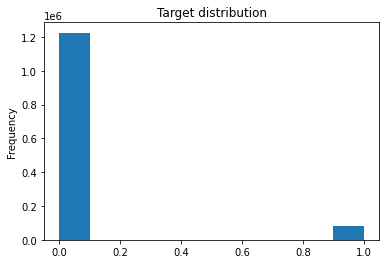

In [ ]:
df.target.plot(kind='hist',title = 'Target distribution') # positive or negative distribution

## Task 4: Create tf.data.Datasets for Training and Evaluation

In [ ]:
train_df, remaining = train_test_split(df,random_state=42,train_size=0.0075, stratify=df.target.values)# 10k samples train_df stratify is for ensuring even distribution
valid_df,_ = train_test_split(remaining,random_state=42, train_size=0.00075,stratify=remaining.target.values)# 1k samples validation random state is for ensuring same output on every runtime
train_df.shape, valid_df.shape #no of rows in both samples

((9795, 3), (972, 3))

In [ ]:
with tf.device('/cpu:0'):#uses cpu instead of gpu ig
  train_data = tf.data.Dataset.from_tensor_slices((train_df['question_text'].values, train_df['target'].values))# creating a input pipeline, creating a datasource returns python iterable uses questiontext and target(positive or negative)
  valid_data = tf.data.Dataset.from_tensor_slices((valid_df['question_text'].values, valid_df['target'].values))# selecting required columns basically

  for text,label in train_data.take(1): # .take(1) takes one entry from the data
    print(text)
    print(label)

tf.Tensor(b'Why are unhealthy relationships so desirable?', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)


## Task 5: Download a Pre-trained BERT Model from TensorFlow Hub

In [ ]:
"""
Each line of the dataset is composed of the review text and its label
- Data preprocessing consists of transforming text to BERT input features:
input_word_ids, input_mask, segment_ids
- In the process, tokenizing the text is done with the provided BERT model tokenizer
"""

 # Label categories
label_list = [0,1] # positive and negative (sincere , and insincere) add more labels for multiclass classification
 # maximum length of (token) input sequences
max_seq_length = 128 #max input length (length of question_text)
train_batch_size = 32 #number of training examples utilized in one iteration
#Tokenization is used in natural language processing to split paragraphs
# and sentences into smaller units that can be more easily assigned meaning


# Get BERT layer and tokenizer:
# More details here: https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2",
                            trainable=True)#importing bert model as KerasLayer and sets it to trainable
                            #for fine tuning
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()#berts vocab file
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()#checks whether bert layer is case sensitive
#or uncased
tokenizer = tokenization.FullTokenizer(vocab_file,do_lower_case) #tokenizer for text




In [ ]:
tokenizer.wordpiece_tokenizer.tokenize('hi, how are you doing?')#returns tokenized output for the sentence

['hi', '##,', 'how', 'are', 'you', 'doing', '##?']

In [ ]:
tokenizer.convert_tokens_to_ids(tokenizer.wordpiece_tokenizer.tokenize('hi, how are you doing?'))
#converts tokens into token ids required, see below diagram

[7632, 29623, 2129, 2024, 2017, 2725, 29632]

## Task 6: Tokenize and Preprocess Text for BERT

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1-SpKFELnEvBMBqO7h3iypo8q9uUUo96P' />
    <p style="text-align: center;color:gray">Figure 2: BERT Tokenizer</p>
</div>

We'll need to transform our data into a format BERT understands. This involves two steps. First, we create InputExamples using `classifier_data_lib`'s constructor `InputExample` provided in the BERT library.

In [ ]:
# This provides a function to convert row to input features and label
# input mask - max length 128, if length is less then padding needs to be done , mask is to ignore the padding, value 0 for padding tokens
# input type ids -if only one sentence , then type ids 0 for all , if two sentences at a time then 0 and 1

#first we are going to create input examples then convert them to input features - like token ids input mask and input type ids
def to_feature(text, label, label_list=label_list, max_seq_length=max_seq_length, tokenizer=tokenizer):
  example = classifier_data_lib.InputExample(guid=None, text_a = text.numpy(), label=label.numpy())#guid unique id for each example but we are working one example at a time so none text_a text that we want to classify
  #text_b for next sentence if we want
  #example created above
  feature=classifier_data_lib.convert_single_example(0,example, label_list, max_seq_length,  tokenizer)  #0th example (index), example itself, labellist(0,1), max length , tokenizer 
  return (feature.input_ids, feature.input_mask, feature.segment_ids, feature.label_id)  #token ids, input mask, and input type ids
  

You want to use [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) to apply this function to each element of the dataset. [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) runs in graph mode.

- Graph tensors do not have a value.
- In graph mode you can only use TensorFlow Ops and functions.

So you can't `.map` this function directly: You need to wrap it in a [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function). The [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function) will pass regular tensors (with a value and a `.numpy()` method to access it), to the wrapped python function.

## Task 7: Wrap a Python Function into a TensorFlow op for Eager Execution

In [ ]:
def to_feature_map(text, label):#basically to apply above function to each row, but read above for the limitations, thats why direct mapping is not allowed
  #instead of graph tensors , it will pass regular tensors with .numpy values
  #wraps values
  input_ids, input_mask, segment_ids, label_id = tf.py_function(to_feature, inp=[text,label],
                                                                Tout=[tf.int32,tf.int32,tf.int32,tf.int32])#apply to_feature to input text,label with Tensorflow output type int32 for the 4 fields
  #it isnt in correct required shape, so we have to shape it manually
  input_ids.set_shape([max_seq_length])
  input_mask.set_shape([max_seq_length])
  segment_ids.set_shape([max_seq_length])
  label_id.set_shape([])#any shape depending on classification # label id=(0,1)positive negative
  x={
      'input_word_ids':input_ids,
      'input_mask':input_mask,
      'input_type_ids':segment_ids
  }# dictionary x has all values
  return (x,label_id)
  

## Task 8: Create a TensorFlow Input Pipeline with `tf.data`

In [ ]:
with tf.device('/cpu:0'):#using all the input functions created and gluing them together
  # train
  #train_data var created above has the training dataset
  train_data = (train_data.map(to_feature_map,num_parallel_calls =tf.data.experimental.AUTOTUNE)
  .shuffle(1000).batch(32,drop_remainder=True)#batch size 32 defined above, and shuffle dataset, and drop remainder to make all batch sizes equal
  .prefetch(tf.data.experimental.AUTOTUNE)# prefetch next batch to avoid IO bottlenecks
  )#maps all training data to the above functions if input elems are independent of each other , then we can parallelise across multiple cpu cores
  #number of parallel calls (cpus the workload is to be split upon)

  # validation data
  valid_data=(valid_data.map(to_feature_map,num_parallel_calls =tf.data.experimental.AUTOTUNE).batch(32,drop_remainder=True).prefetch(tf.data.experimental.AUTOTUNE))
  

The resulting `tf.data.Datasets` return `(features, labels)` pairs, as expected by [`keras.Model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit):

In [ ]:
# train data spec
train_data.element_spec #specifications of data

({'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [ ]:
# valid data spec
valid_data.element_spec

({'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

## Task 9: Add a Classification Head to the BERT Layer

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 3: BERT Layer</p>
</div>

In [ ]:
# Building the model
def create_model():
  input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,),dtype=tf.int32,name="input_word_ids")
  input_mask = tf.keras.layers.Input(shape=(max_seq_length,),dtype=tf.int32,name="input_mask")
  input_type_ids = tf.keras.layers.Input(shape=(max_seq_length,),dtype=tf.int32,name="input_type_ids")
  pooled_output,sequence_output = bert_layer([input_word_ids, input_mask, input_type_ids])#pooled output is a fixedlength vector representation of the input text, 
  #sequence output is a sequence length hidden state representation of each token in the input text
  #just converting data to a rich vector representation
  drop = tf.keras.layers.Dropout(0.4)(pooled_output)#to prevent overfitting of data add a dropout layer dropout to pooled output
  output=tf.keras.layers.Dense(1, activation='sigmoid',name="output")(drop)#added one dense layer and '1' represents one softmax unit added output to the output of the drop unit
  model=tf.keras.Model(inputs={'input_word_ids':input_word_ids,
      'input_mask':input_mask,
      'input_type_ids':input_type_ids}
      ,
      outputs=output#above output variable
      )
  return model#creates model without fine tuning
  #A dense layer in deep learning refers to a fully connected layer in a neural network, where each neuron in the 
  #layer is connected to all neurons in the previous layer. 
 # This means that the output of each neuron in the dense layer is a weighted sum of all the outputs from the neurons in the previous layer.

#Softmax units refer to the activation function used in a dense layer of a neural network, specifically in the output layer. 
#The softmax function is used for multi-class classification problems, where the goal is to predict one of several possible class labels.

#The softmax function takes in a vector of arbitrary real values and returns a vector of values in the range [0,1] that sum up to 1, representing a probability distribution over the classes. 
#Each element in the output vector of the softmax function represents the probability of the input belonging to a particular class.

#The main purpose of using the softmax function in the output layer is to convert the output of the network into a probability distribution over the classes,
# making it easier to interpret the predictions and calculate the loss. The most likely class is then chosen as the prediction based on the class with the highest probability.


## Task 10: Fine-Tune BERT for Text Classification

In [ ]:
model = create_model()
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5),loss=tf.keras.losses.BinaryCrossentropy(),metrics=[tf.keras.metrics.BinaryAccuracy()]
              # binary for positive negative if multiple classes then sparse categorical entropy
)#learning rate 2e^-5
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 128)]        0           []                               
                                                                                                  
 input_type_ids (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 keras_layer (KerasLayer)       [(None, 768),        109482241   ['input_word_ids[0][0]',         
                                 (None, 128, 768)]                'input_mask[0][0]',         

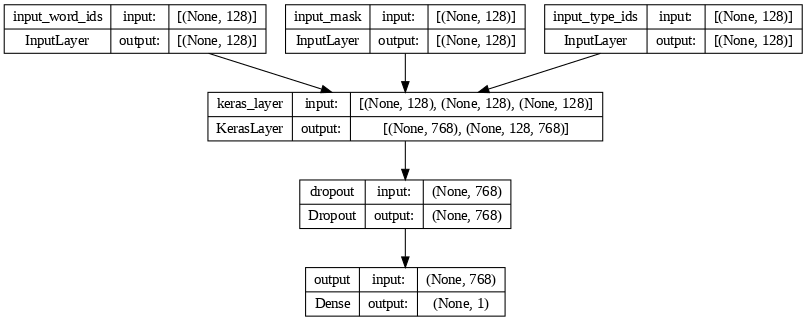

In [ ]:
tf.keras.utils.plot_model(model=model,show_shapes=True,dpi =76)# look at this last dense layer is softmax unit

In [ ]:
# Train model
epochs = 4
history = model.fit(train_data,validation_data=valid_data,epochs=epochs,verbose=1)

Epoch 1/4
306/306 [==============================] - 277s 858ms/step - loss: 0.1803 - binary_accuracy: 0.9333 - val_loss: 0.1363 - val_binary_accuracy: 0.9573
Epoch 2/4
306/306 [==============================] - 262s 853ms/step - loss: 0.0979 - binary_accuracy: 0.9618 - val_loss: 0.1196 - val_binary_accuracy: 0.9552
Epoch 3/4
306/306 [==============================] - 262s 855ms/step - loss: 0.0476 - binary_accuracy: 0.9825 - val_loss: 0.1312 - val_binary_accuracy: 0.9542
Epoch 4/4
306/306 [==============================] - 262s 854ms/step - loss: 0.0216 - binary_accuracy: 0.9931 - val_loss: 0.1990 - val_binary_accuracy: 0.9500


## Task 11: Evaluate the BERT Text Classification Model

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

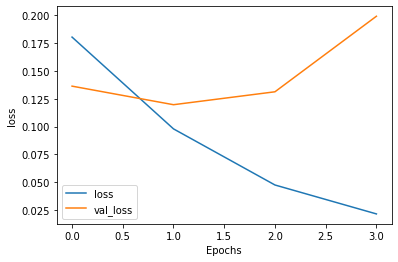

In [ ]:
plot_graphs(history, 'loss')

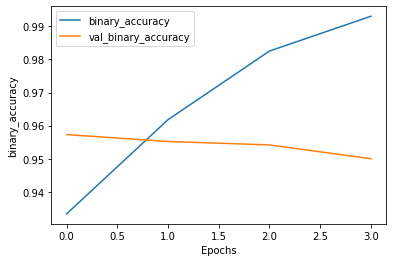

In [ ]:
plot_graphs(history,"binary_accuracy")

In [ ]:
sample_example = ["I will kill you", " How to cook an egg?", "How to eat cyanide"]
test_data=tf.data.Dataset.from_tensor_slices((sample_example,[0]*len(sample_example)))
test_data=(test_data.map(to_feature_map).batch(1))
preds=model.predict(test_data)
threshold = 0.5#between 0 and 1 
['Toxic'if pred>=threshold else 'Sincere' for pred in preds]

3/3 [==============================] - 1s 17ms/step


['Toxic', 'Sincere', 'Sincere']